## Importing dataframe and libraries

In [73]:
# Importing libraries

import pandas as pd
import numpy as np
import os

In [74]:
# Establishing project path

path = r'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [75]:
path

'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [76]:
# Importing "global_startup_cleaned.pkl" dataframe

global_startup_cleaned = pd.read_pickle(os.path.join(path, '02_data', 'prepared_data', 'global_startup_cleaned.pkl'))

In [77]:
global_startup_cleaned.head(5)

,startup_name,founded_year,country,industry,funding_stage,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,acquired,ipo,customers_millions,tech_stack,social_media_followers
0,Startup_1,2009-01-01,Canada,Healthcare,Series A,269.0,3047.0,104.0,46.11,5.0,No,No,43.0,"Java, Spring",4158814.0
1,Startup_2,2004-01-01,UK,Healthcare,IPO,40.0,630.0,431.0,33.04,1.0,No,Yes,64.0,"Node.js, React",4063014.0
2,Startup_3,2018-01-01,USA,Healthcare,Seed,399.0,2475.0,375.0,15.79,8.0,No,No,74.0,"PHP, Laravel",3449855.0
3,Startup_4,2014-01-01,France,Tech,Seed,404.0,1011.0,907.0,17.12,7.0,Yes,Yes,26.0,"Python, AI",630421.0
4,Startup_5,2006-01-01,Japan,Energy,Series C,419.0,3917.0,280.0,4.39,6.0,Yes,Yes,30.0,"Node.js, React",365956.0


In [78]:
# Importing libraries for visualizations

import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Importing libraries for linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test

Hypothesis to be tested:
- If a startup receives more funding, then its annual revenue will be higher.
- If a startup has a higher success score, then its market valuation will be higher

## Hyphotesis 1: If a startup receives more funding, then its annual revenue will be higher

In [80]:
# Selecting and preparing the variables, converting variables into NumPy arrays

X = global_startup_cleaned[['total_funding_millions']].values.reshape(-1,1)
y = global_startup_cleaned['annual_revenue_millions'].values.reshape(-1,1)

In [81]:
# Splitting into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Creating regression model

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [83]:
# Making predictions (test set)

y_pred = regression.predict(X_test)

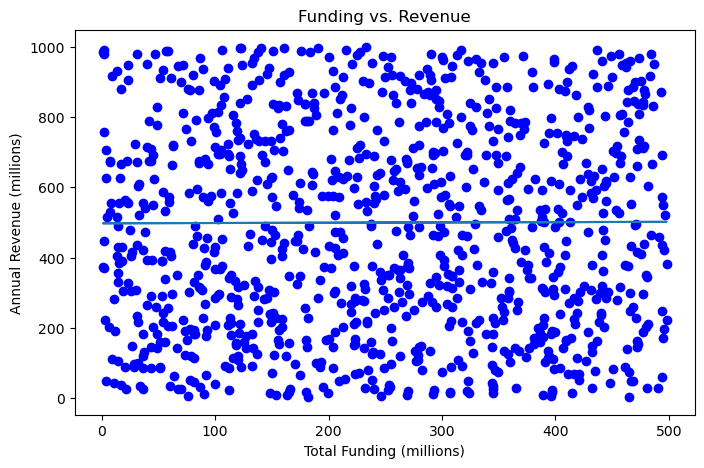

In [84]:
# Plot regression line (test set)

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, label='Predicted')
plt.xlabel('Total Funding (millions)')
plt.ylabel('Annual Revenue (millions)')
plt.title('Funding vs. Revenue')
plt.show()

In [100]:
# Model performance statistics (MSE and R2 score)

mse_funding_and_revenue = mean_squared_error(y_test, y_pred)
r2_funding_and_revenue = r2_score(y_test, y_pred)

In [101]:
mse_funding_and_revenue

211.35812003739056

In [102]:
r2_funding_and_revenue

-0.0010973479159106514

### Comparing the predicted "y" values with the actual "y" values in a dataframe -> Annual Revenue

In [88]:
comparison_revenue = pd.DataFrame({
    'Actual Revenue': y_test.flatten(),
    'Predicted Revenue': y_pred.flatten()})

In [89]:
comparison_revenue.head(20)

,Actual Revenue,Predicted Revenue
0,319.0,501.147716
1,265.0,498.437567
2,796.0,500.767789
3,905.0,499.872849
4,408.0,500.109248
5,352.0,499.999491
6,898.0,499.729321
7,901.0,498.749952
8,989.0,498.910366
9,509.0,498.285596


Compare the predicted y values with the actual y values in a dataframe. Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

## Hyphotesis 2: If a startup has a higher success score, then its market valuation will be higher

In [90]:
# Selecting and preparing the variables, converting variables into NumPy arrays

X = global_startup_cleaned[['success_score']].values.reshape(-1,1)
y = global_startup_cleaned['valuation_billions'].values.reshape(-1,1)

In [91]:
# Splitting into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Creating regression model

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [93]:
# Making predictions (test set)

y_pred = regression.predict(X_test)

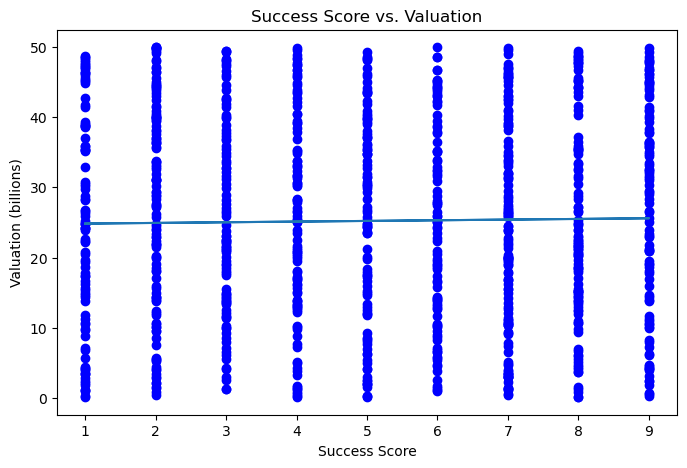

In [94]:
# Plot regression line (test set)

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, label='Predicted')
plt.xlabel('Success Score')
plt.ylabel('Valuation (billions)')
plt.title('Success Score vs. Valuation')
plt.show()

In [95]:
# Model performance statistics (MSE and R2 score)

mse_success_and_valuation = mean_squared_error(y_test, y_pred)
r2_success_and_valuation = r2_score(y_test, y_pred)

In [96]:
mse_success_and_valuation

211.35812003739056

In [97]:
r2_success_and_valuation

-0.0010973479159106514

### Comparing the predicted "y" values with the actual "y" values in a dataframe -> Annual Revenue

In [98]:
comparison_valuation = pd.DataFrame({
    'Actual Valuation': y_test.flatten(),
    'Predicted Valuation': y_pred.flatten()})

In [99]:
comparison_valuation.head(20)

,Actual Valuation,Predicted Valuation
0,14.36,24.835364
1,10.74,25.498205
2,26.56,25.498205
3,47.68,25.498205
4,35.70,25.592897
5,11.13,25.403514
6,16.73,25.308822
7,13.79,25.024748
8,31.63,25.119439
9,5.97,25.498205
